# Feature Selection Techniques

*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0/
*   e-mail - sanjay.s.rao04@gmail.com

**Description:**

 **Bank Note Authentication UCI data** 

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

**Attribute Information:**
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) It can only have two values: 0 (authentic) or 1 (inauthentic)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#checking the dimension of the dataset
df.shape

(1372, 5)

In [4]:
#count of the categorical values
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [5]:
#Checking for missing values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
X = df.drop(columns = ['class'],axis = 1) #independent variables
y = df["class"] #target variable

In [7]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

### Entropy based Feature Selection

*sklearn.feature_selection.mutual_info_classif*

**Mutual information (MI)** between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [9]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
print(mi_score)

[0.37796729 0.22742119 0.12327663 0.01673816]


In [10]:
from sklearn.model_selection import train_test_split as tts
X_train1, X_test1, y_train, y_test = tts(X,y,random_state = 2, stratify=y)

In [11]:
#Dataset 2 with features having MI Scores > 0.2
mi_score_selected_index = np.where(mi_score > 0.2)[0]
X_2 = X.iloc[:,mi_score_selected_index]
X_train2, X_test2, y_train, y_test = tts(X_2,y,random_state = 2, stratify=y)

In [12]:
#Dataset 3 with features having MI Scores < 0.2
mi_score_selected_index = np.where(mi_score < 0.2)[0]
X_3 = X.iloc[:,mi_score_selected_index]
X_train3, X_test3, y_train, y_test = tts(X_3,y,random_state = 2, stratify=y)

In [13]:
#Comparing the 3 datsets with the help of Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as DTC
model_1 = DTC().fit(X_train1,y_train)
model_2 = DTC().fit(X_train2,y_train)
model_3 = DTC().fit(X_train3,y_train)
score_1 = model_1.score(X_test1,y_test)
score_2 = model_2.score(X_test2,y_test)
score_3 = model_3.score(X_test3,y_test)
print(f"Score 1 : {score_1}\nScore 2 : {score_2}\nScore 3 : {score_3}")

Score 1 : 0.9737609329446064
Score 2 : 0.9212827988338192
Score 3 : 0.6880466472303207


From the aboce scores, we can see that there is 92% accuracy in the model with features having MI Score > 0.2
The original model shows an accuracy of 97% but it is mostly overfitting the model.
Hence we choose the model with 2 features having MI Score > 0.2

### Feature Selection based on Filtering Correlation

In [17]:
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

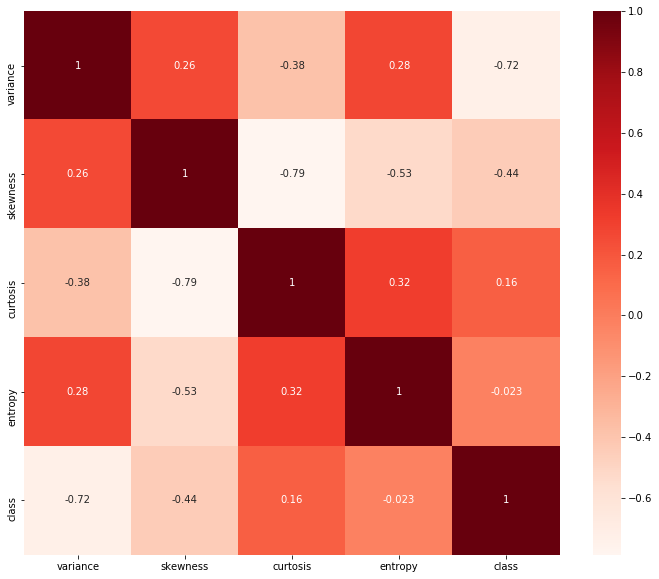

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
#Correlation with output variable
cor_target = abs(cor["class"])

#Selecting highly correlated features
print("cor_target \n", cor_target)
print("\n")
relevant_features = cor_target[cor_target>0.4]
print("relevant_features \n", relevant_features)

cor_target 
 variance    0.724843
skewness    0.444688
curtosis    0.155883
entropy     0.023424
class       1.000000
Name: class, dtype: float64


relevant_features 
 variance    0.724843
skewness    0.444688
class       1.000000
Name: class, dtype: float64


### Model based feature selection

In [18]:
### Forward Elimination
model = LinearRegression()
#Initializing Recurrsive Feature Elimination (RFE) model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False]
[1 2 1 3]


In [19]:
### RFE: Recurrsive Feature Elimination
#no of features
nof_list=np.arange(1,13)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
  X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.3)
  model = LinearRegression()
  rfe = RFE(model,n_features_to_select = nof_list[n])
  X_train_rfe = rfe.fit_transform(X_train,y_train)
  X_test_rfe = rfe.transform(X_test)
  model.fit(X_train_rfe,y_train)
  score = model.score(X_test_rfe,y_test)
  score_list.append(score)
  if(score>high_score):
    high_score = score
    nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.877262


In [21]:
### Backward Elimination
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const        0.000000e+00
variance     0.000000e+00
skewness    2.147287e-308
curtosis     0.000000e+00
entropy      8.039308e-01
dtype: float64

In [22]:
### Getting the details about final selected features
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,n_features_to_select = 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')
